## Aufgabe 3: Vorhersage Marktanteile
For the final model see the LSTM version of task 3.

In [1]:
%matplotlib inline
import psycopg2
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from fbprophet import Prophet
import statsmodels

In [2]:
# local db
conn = psycopg2.connect("dbname=eveonline user=REPLACE_USER")
cur = conn.cursor()

In [3]:
# ships
cur.execute(
"""
select total.month as month, total.turnover as total, shuttle.turnover as shuttles, frigate.turnover as frigates, cruiser.turnover as cruisers, destroyer.turnover as destroyers, bc.turnover as battlecruisers, bs.turnover as battleships, cap.turnover as capital_ships, indy.turnover as industrial_ships, mining.turnover as mining_barges, sped.turnover as special_edition_ships, rookie.turnover as rookie_ships

from

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=4
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as total left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=391
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as shuttle On (total.month= shuttle.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1361
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as frigate on (total.month= frigate.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1367
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as cruiser  on (total.month= cruiser.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1372
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as destroyer  on (total.month= destroyer.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1374
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as bc on (total.month= bc.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1376
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as bs on (total.month= bs.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1381
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as cap on (total.month= cap.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1382
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as indy on (total.month= indy.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1384
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as mining on (total.month= mining.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1612
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as sped on (total.month= sped.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1815
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as rookie on (total.month= rookie.month)
""")

In [4]:
ships = cur.fetchall()

In [5]:
len(ships)

48

In [6]:
cur.execute("""
select total.month as month, total.turnover as total, rocket.turnover as rocket_launchers, light.turnover as light_missile_launchers, rlml.turnover as rapid_missile_launchers, heavy.turnover as heavy_launchers, cruise.turnover as cruise_launchers, torpedo.turnover as torpedo_launchers, xl.turnover as xl_launchers, hal.turnover as heavy_assault_launchers, rhml.turnover as rapid_heavy_missile_launchers, rapidTorp.turnover as rapid_torpedo_launchers

from

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=140
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as total left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=639
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as rocket On (total.month= rocket.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=640
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as light on (total.month= light.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=641
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as rlml on (total.month= rlml.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=642
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as heavy  on (total.month= heavy.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=643
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as cruise on (total.month= cruise.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=644
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as torpedo on (total.month= torpedo.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=777
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as xl on (total.month= xl.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=974
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as hal on (total.month= hal.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1827
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as rhml on (total.month= rhml.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=2247
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as rapidTorp on (total.month= rapidTorp.month)
""")

In [7]:
missile_launchers = cur.fetchall()

In [8]:
len(missile_launchers)

48

In [9]:
cur.execute("""
select total.month as month, total.turnover as total, raw.turnover as raw_materials, gas.turnover as gas_clouds_materials, ice.turnover as ice_products, reaction.turnover as reaction_materials, planetary.turnover as planetary_materials, mineral.turnover as minerals, salvage.turnover as salvage_materials, faction.turnover as faction_materials

from

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=533
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as total left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1031
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as raw On (total.month= raw.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1032
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as gas on (total.month= gas.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1033
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as ice on (total.month= ice.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1034
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as reaction  on (total.month= reaction.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1332
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as planetary on (total.month= planetary.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1857
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as mineral on (total.month= mineral.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1861
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as salvage on (total.month= salvage.month)

left outer join

(select date_trunc('month', "time") as "month", sum(sales_units*avgprice) turnover
from items i
where i.typeid in (
 (WITH RECURSIVE product_hierarchy(marketgroupid, marketgroupname, parentgroupid, test) AS (
  select marketgroupid, marketgroupname, parentgroupid, 1 as test FROM invmarketgroups WHERE marketgroupid=1897
 UNION
  SELECT im.marketgroupid, im.marketgroupname, im.parentgroupid, ph.test+1
  FROM product_hierarchy ph,invmarketgroups im
  WHERE ph.marketgroupid = im.parentgroupid
 )
 select distinct(t.typeid)
 from product_hierarchy p,
 (select typeid, typename, marketgroupid from types group by typeid, typename, marketgroupid) t
 where t.marketgroupid=p.marketgroupid)
)
group by 1
order by 1) as faction on (total.month= faction.month)
""")

In [10]:
materials = cur.fetchall()

In [11]:
len(materials)

48

In [12]:
df_ships = pd.DataFrame(ships,
                        columns=['month', 'total', 'shuttles', 'frigates', 'cruisers',
                                 'destroyers', 'battlecruisers', 'battleships', 'capital',
                                 'industrial', 'mining', 'special_edition', 'rookie'])

In [13]:
df_missile_launchers = pd.DataFrame(missile_launchers,
                                    columns=['month', 'total', 'rocket', 'light', 'rapid',
                                             'heavy', 'cruise', 'torpedo', 'xl', 'heavy_assault',
                                             'rapid_heavy', 'rapid_torpedo'])

In [14]:
df_materials = pd.DataFrame(materials,
                            columns=['month', 'total', 'raw', 'gas_clouds', 'ice', 'reaction',
                                     'planetary', 'mineral', 'salvage', 'fraction'])

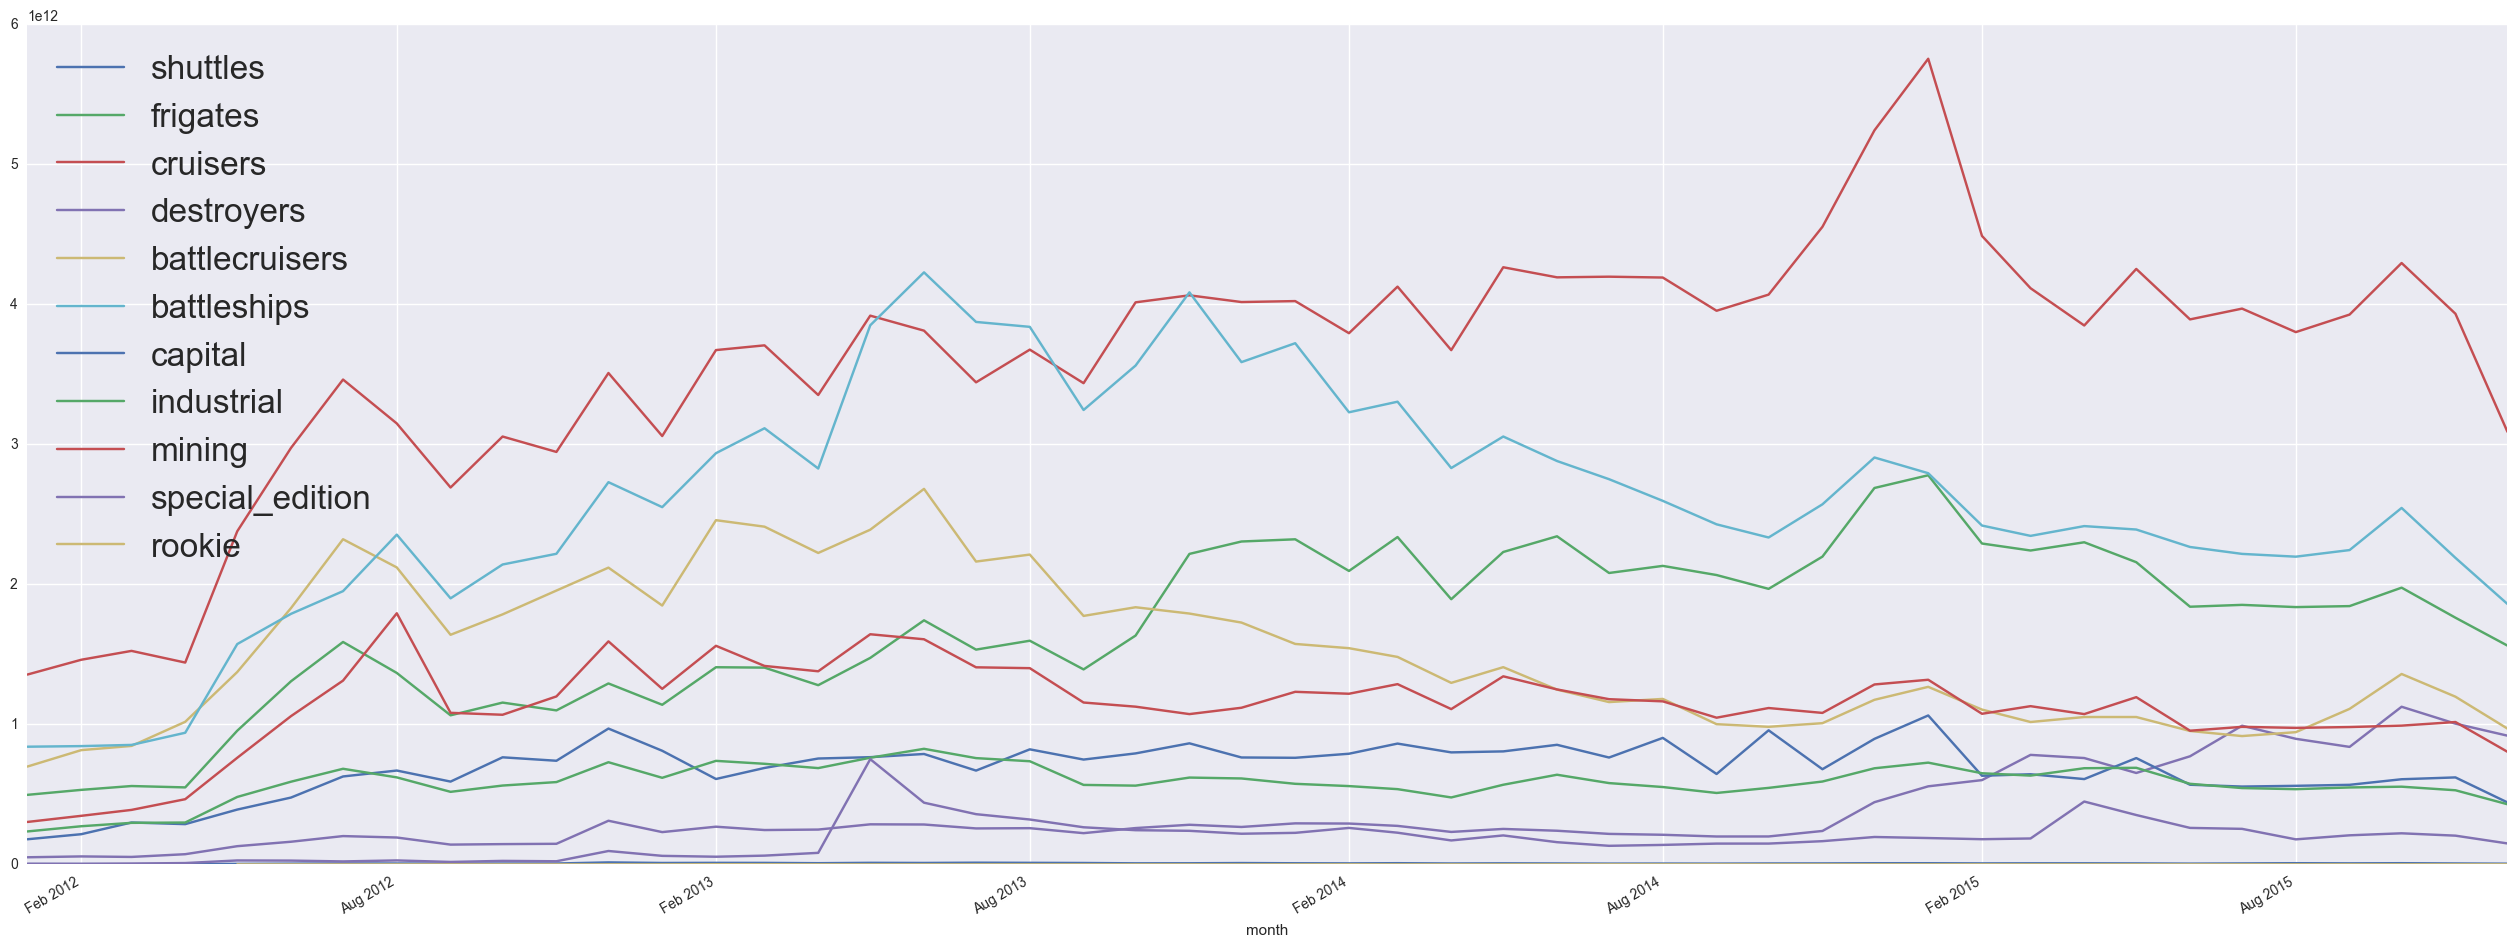

In [17]:
df_ships.plot('month',
              ['shuttles', 'frigates', 'cruisers', 'destroyers', 'battlecruisers', 'battleships',
               'capital', 'industrial', 'mining', 'special_edition', 'rookie'],
              figsize=(32 , 12)).legend(loc='best', fontsize=24)

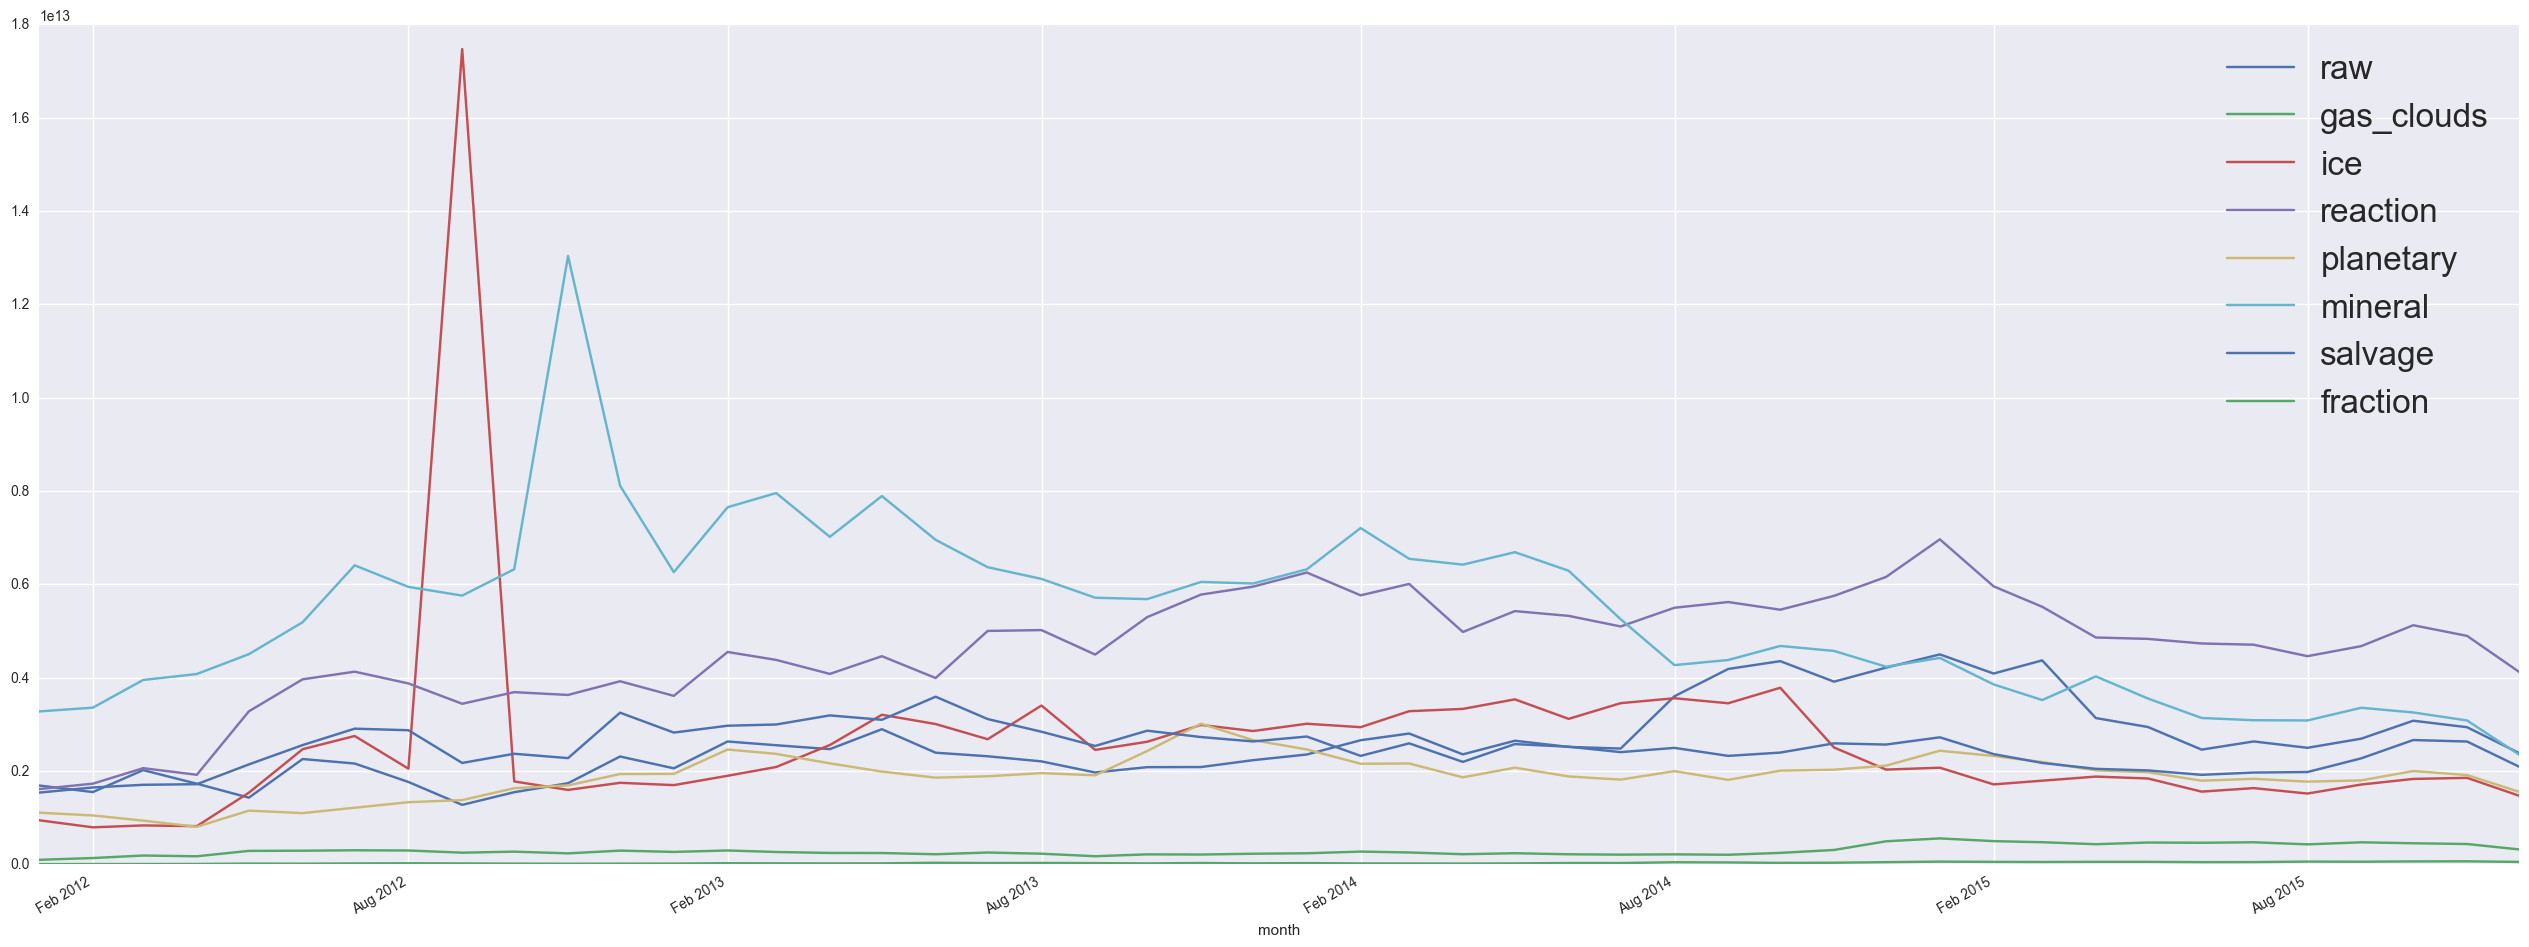

In [18]:
df_materials.plot('month',
                  ['raw', 'gas_clouds', 'ice', 'reaction', 'planetary',
                   'mineral', 'salvage', 'fraction'],
                  figsize=(32 , 12)).legend(loc='best', fontsize=24)

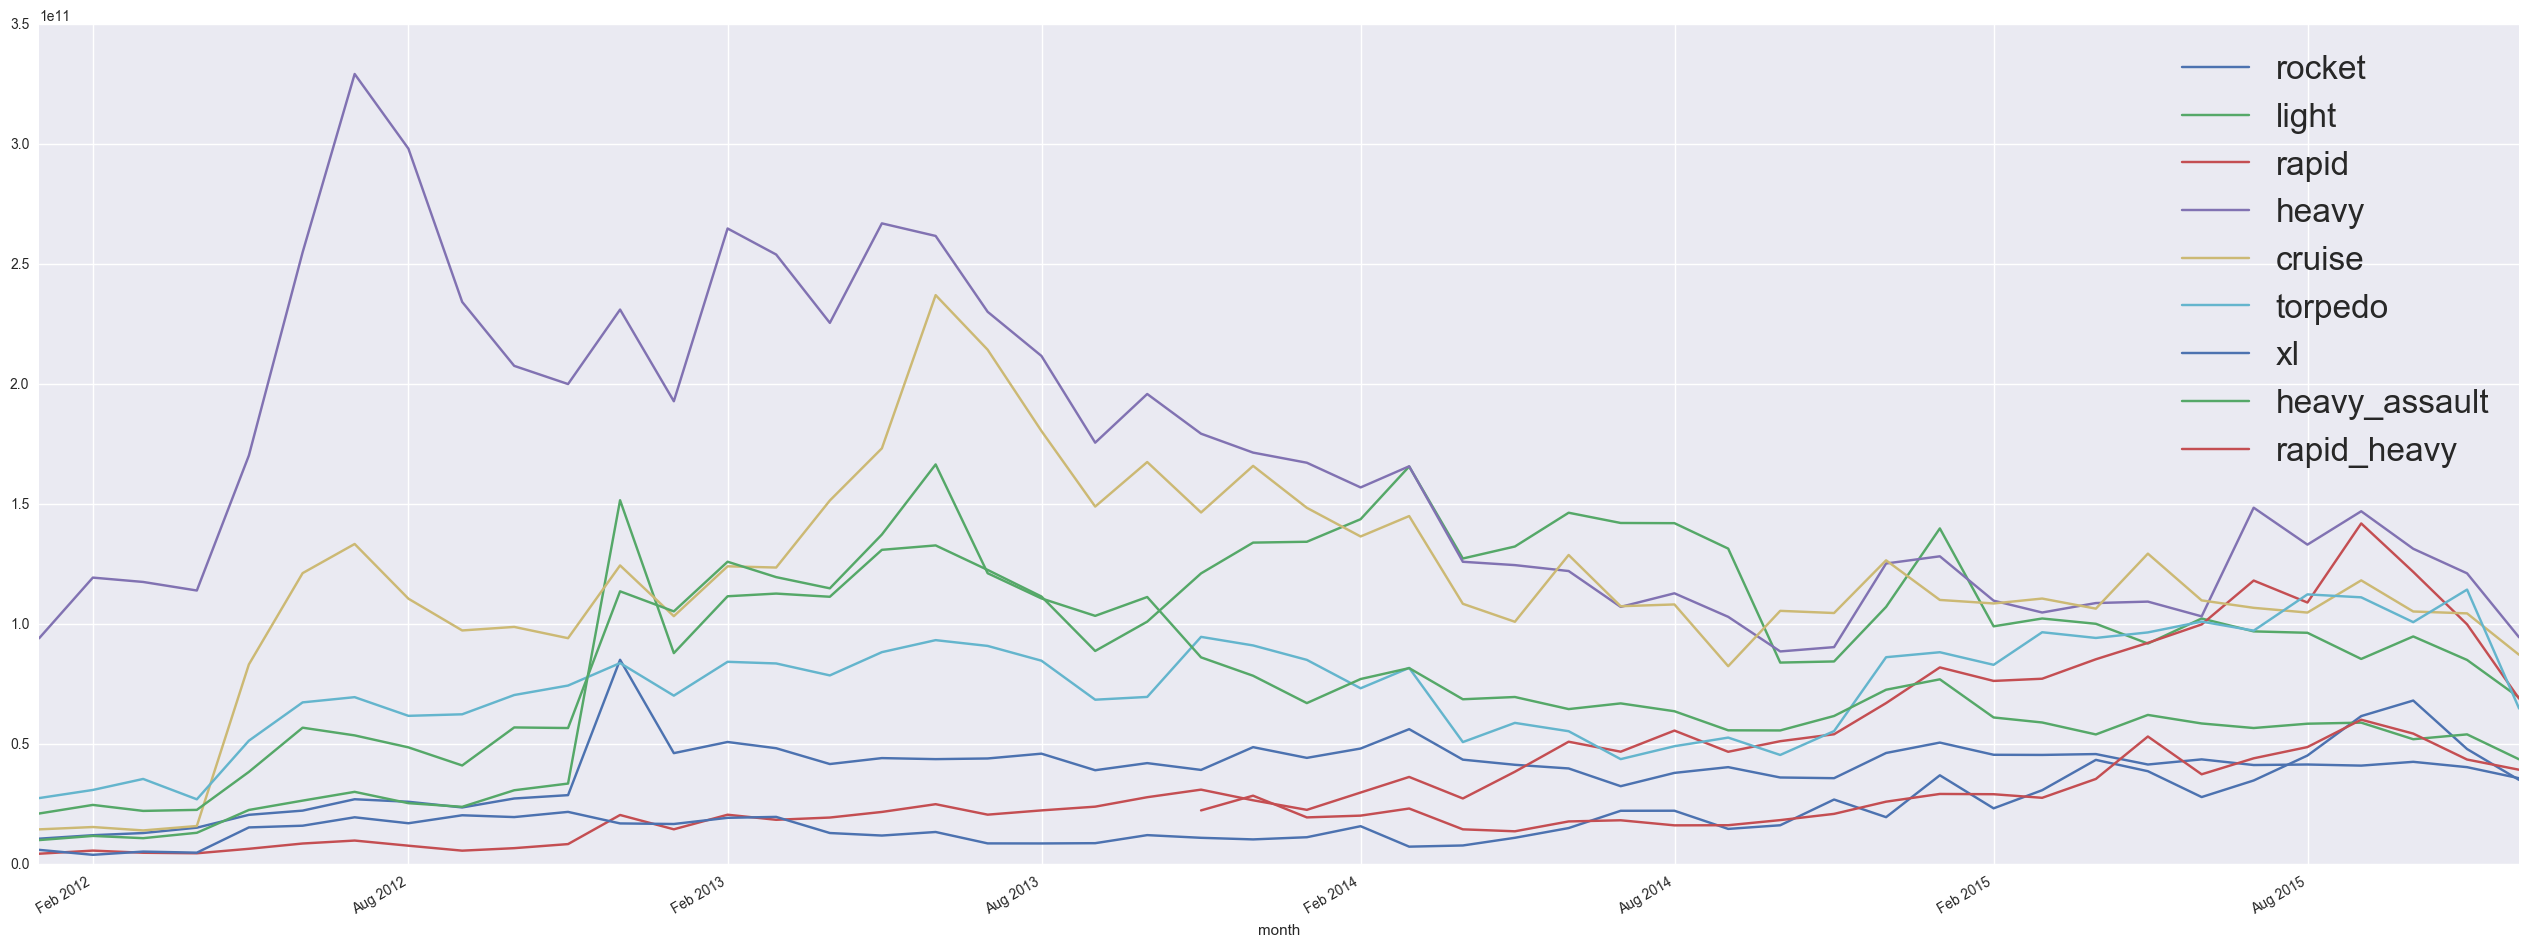

In [19]:
df_missile_launchers.plot('month',
                          ['rocket', 'light', 'rapid', 'heavy', 'cruise', 'torpedo',
                           'xl', 'heavy_assault', 'rapid_heavy', 'rapid_torpedo'],
                          figsize=(32 , 12)).legend(loc='best', fontsize=24)

In [20]:
from statsmodels.tsa.vector_ar.var_model import VAR
# from statsmodels.tsa.stattools import adfuller

In [21]:
# TODO: make stationary
# * train prophet, save trend per segment, (stationary = data - trend)
# * train VAR, forecast (final = data + trend)

In [43]:
def fix_datetime(series):
    return list(map(lambda v: pd.to_datetime(str(v).split(' ')[0]), series.values))

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.tsatools import detrend, add_trend

def detect_trend(df_raw, product, plot=False, fillna=True):
    # build date index
    df = df_raw[[product]]
    df.index = pd.DatetimeIndex(fix_datetime(df_raw['month']))
    
    if fillna:
        df.fillna(0, inplace=True)

    if plot:
        res.plot()

    # approach 1: good trend
    res = seasonal_decompose(df)

    # residual holds what remains unmodeled
    residual = res.resid
    seasonal = res.seasonal
    trend = res.trend
    
    # approach 2: trend sucks
    # detrended = detrend(df)
    # trend = df[product].values - detrended[product].values
    # plt.plot(detrended[product].values)
    # plt.plot(trend)
    # plt.show()

    # FIXME: why does the convolution happening inside the seasonal
    # decomposition yield nan's at the start and end of the trend?
    if np.isnan(trend[product].values).any():
        trend = trend.interpolate(method='piecewise_polynomial')
        print("interpolated trend because of missing nans")

    detrended = df[product].values - trend.fillna(0)[product].values - seasonal.fillna(0)[product]
    # print(detrended)

    return (detrended, seasonal, trend, residual)

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


interpolated trend because of missing nans


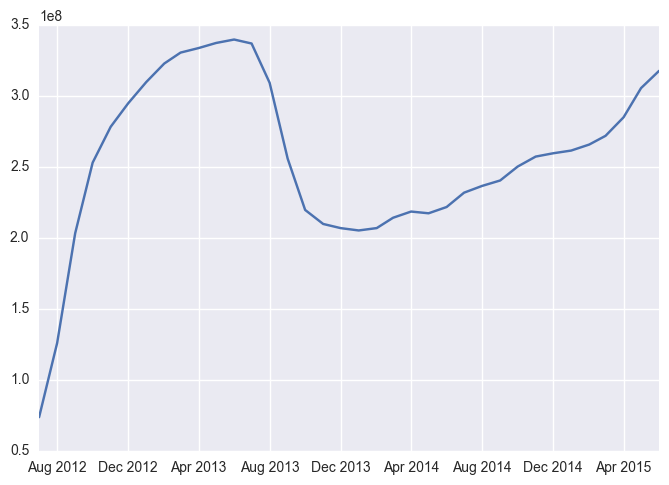

In [139]:
detrended, seasonal, trend, residual = detect_trend(df_ships, 'rookie')
plt.plot(trend)
plt.show()

In [140]:
from tqdm import tqdm_notebook as tqdm

cleaned = []

for df in [df_materials, df_missile_launchers, df_ships]:
    c = []
    for product in tqdm([col for col in df.columns if col != 'month']):
        try:
            c.append(detect_trend(df, product))
        except Exception as e:
            print(e)
            print("for", product)
    cleaned.append(c)

The installed widget Javascript is the wrong version.
/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2842: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans



The installed widget Javascript is the wrong version.


interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans



The installed widget Javascript is the wrong version.


interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans
interpolated trend because of missing nans



---
## Materials


In [146]:
cleaned_materials = cleaned[0]
material_data = np.array([lambda x: x[0] for x in cleaned_materials]).reshape(-1, 1)
print(material_data.shape)
material_var = VAR(dates=fix_datetime(df_materials['month']),
                   endog=material_data,
                   freq='m')

(9, 1)


ValueError: Only gave one variable to VAR

## Ships

In [172]:
shipm = VAR(dates=fix_datetime(df_ships['month']),
            endog=df_ships[['shuttles', 'frigates', 'cruisers',
                            'destroyers', 'battlecruisers', 'battleships', 'capital',
                            'industrial', 'mining', 'special_edition', 'rookie']].fillna(0).as_matrix(),
            freq='m')
res = shipm.fit()
last_date = max(fix_datetime(df_ships['month']))

print(last_date)

yhat = shipm.predict(res.params, start=pd.to_datetime(last_date),  end=pd.to_datetime("2016-03-01"))

2015-12-01 00:00:00


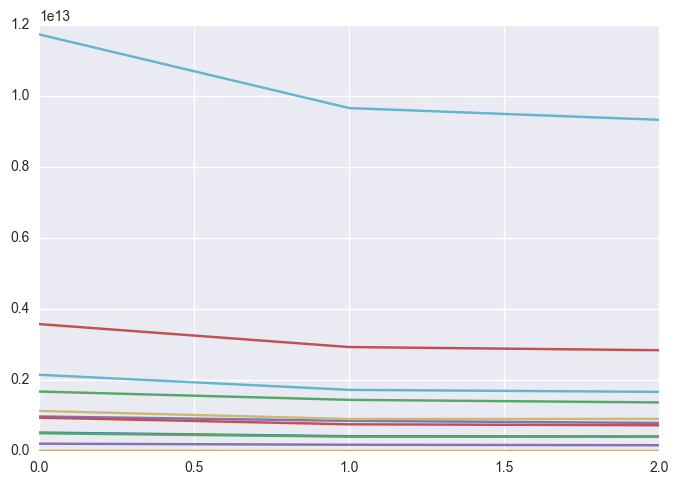

In [180]:
plt.plot(yhat)
plt.plot(np.sum(yhat, axis=1))
plt.show()

In [67]:
import numpy as np
import random
def softmax(w):
    w = np.array(w)
    maxes = np.amax(w, axis=1)
    maxes = maxes.reshape(maxes.shape[0], 1)
    e = np.exp(w - maxes)
    dist = e / np.sum(e, axis=1)
    return dist

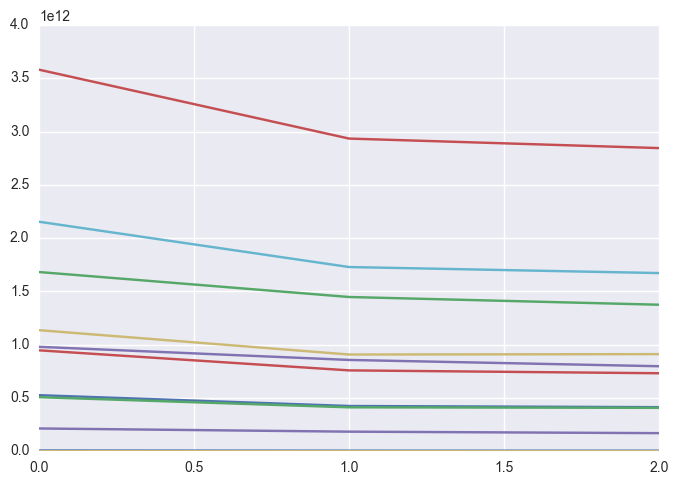

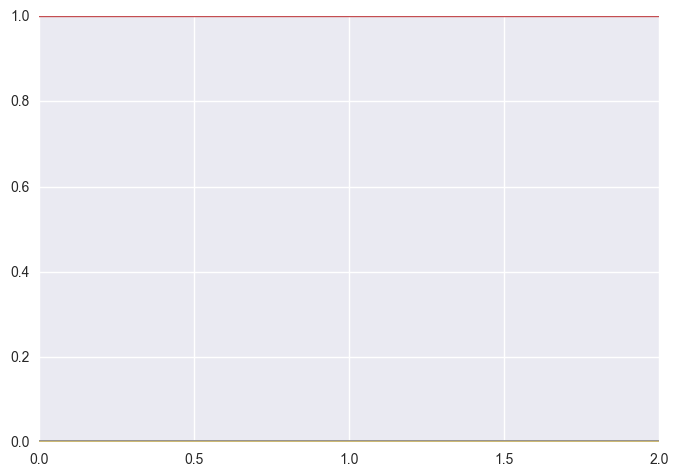

In [202]:
plt.plot(yhat)
plt.show()

plt.plot([softmax(y) for y in yhat])
plt.show()

## Market Share Analysis
**Idea:** ~~if forecasts do not sum up to 1, add/subtract the remaining diff/n for n products in the market segment, such that each forecasted market share per product gets "corrected". (Is there a correct way to do it? Does VAR account for this?~~
=> Softmax


## Imputation for December

In [44]:
def forecast_dec(df, target):
    assert target in df.columns, "df has no such column"

    subdf = df[['month', target]].rename(columns={target: 'y', 'month': 'ds'})
    subdf['y'] = np.log(subdf['y'])
    subdf['ds'] = fix_datetime(subdf['ds'])
    m = Prophet().fit(subdf)
    future = m.make_future_dataframe(periods=1, freq = 'm')
    return m.predict(future)

In [50]:
forec = forecast_dec(df_materials, 'raw')

In [54]:
forec.iloc[-1]['yhat']

-2386219999971.542

In [49]:
df_materials[['raw', 'month']].iloc[-1]

raw                    2.38622e+12
month    2015-12-01 00:00:00+01:00
Name: 47, dtype: object

### Result of Imputation
obviously the forecasted value is quite off, so I'll just stick to the december as is.

In [102]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    import numpy as np
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [103]:
x = df_materials.drop(['month'], axis=1).iloc[0].values
print(x)
print(softmax(x))
print(softmax(x / max(x)))
print(sum(softmax(x / max(x))))

[  1.02793982e+13   1.69050638e+12   9.82385577e+10   9.45902274e+11
   1.61411408e+12   1.10822180e+12   3.27801544e+12   1.53815919e+12
   6.24045778e+09]
[ 1.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 0.22988552  0.0996872   0.08538226  0.09272153  0.09894911  0.09419729
  0.11633492  0.09822066  0.08462152]
1.0


In [104]:
dfs = {
    'ships': df_ships,
    'missile_launchers': df_missile_launchers,
    'materials': df_materials
}

In [105]:
from tqdm import tqdm

In [125]:
for k in tqdm(dfs.keys()):
    df = dfs[k].fillna(0)

    with open('../output/aufgabe_3_softmaxed_{0}.csv'.format(k), 'w') as f:
        f.write(','.join(df.columns.values) + '\n')

        for i, row in df.iterrows():
            x = np.array(row.drop('month').values)

            # normalized by the biggest value as they are way too big
            # and result in bogus softmax values
            x /= max(x)
            
            sx = softmax(x.astype(float))
            ssx = list(map(str, sx))
            r = [row['month'].strftime("%Y-%m-%d")] + ssx
            f.write(','.join(r) + '\n')

100%|██████████| 3/3 [00:00<00:00, 17.01it/s]
